# Cargar Datos

In [1]:
import pandas as pd

# Ruta al archivo
ruta = 'dataset/stocks/TWTR.csv'

# Cargar el dataset
df = pd.read_csv(ruta)

# Convertir la columna de fecha a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna de fecha como índice
df.set_index('Date', inplace=True)

# Establecer la frecuencia del índice
df = df.asfreq('D') # D: Diario, ME: Mensual, YE: Anual

# Comprobar valores nulos
print(df.isnull().sum())

# Relenar valores nulos si existen (interpolación)
if df.isnull().sum().sum() > 0:
    df.interpolate(method='linear', inplace=True) # linear, pchip...

    # Visualizar valores nulos
    print(df.isnull().sum())

# Visualizar el dataset
print(df.head())

Open         728
High         728
Low          728
Close        728
Adj Close    728
Volume       728
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
                 Open       High        Low      Close  Adj Close  \
Date                                                                
2013-11-07  45.099998  50.090000  44.000000  44.900002  44.900002   
2013-11-08  45.930000  46.939999  40.689999  41.650002  41.650002   
2013-11-09  44.120000  45.626666  40.260000  42.066668  42.066668   
2013-11-10  42.310000  44.313333  39.830001  42.483335  42.483335   
2013-11-11  40.500000  43.000000  39.400002  42.900002  42.900002   

                  Volume  
Date                      
2013-11-07  1.177016e+08  
2013-11-08  2.792530e+07  
2013-11-09  2.398817e+07  
2013-11-10  2.005103e+07  
2013-11-11  1.611390e+07  


# White Noise

In [2]:
import numpy as np

wn = np.random.normal(loc = df['Close'].mean(), scale = df['Close'].std(), size = len(df['Close'])) # White Noise

# Convertir a DataFrame
wn = pd.DataFrame(wn, index = df.index, columns = ['Close'])

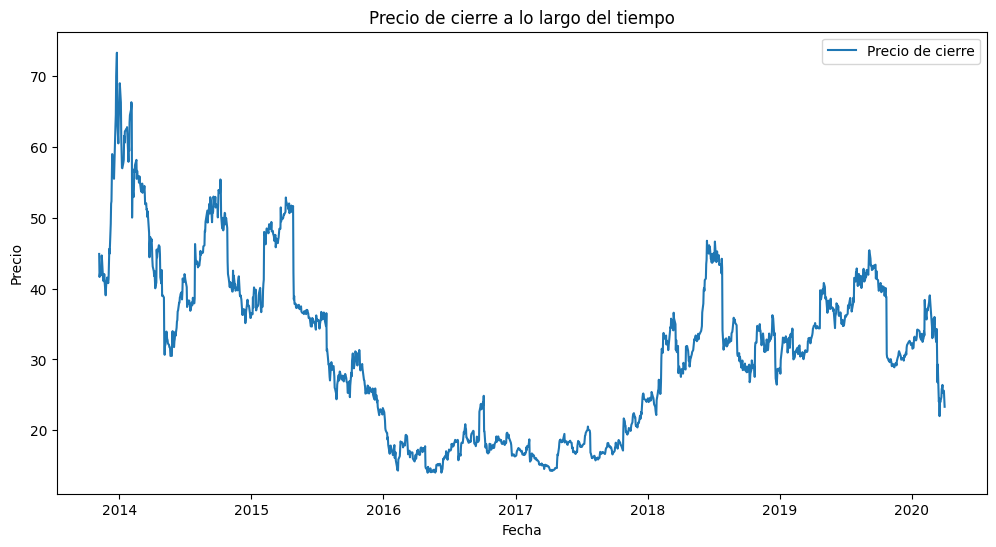

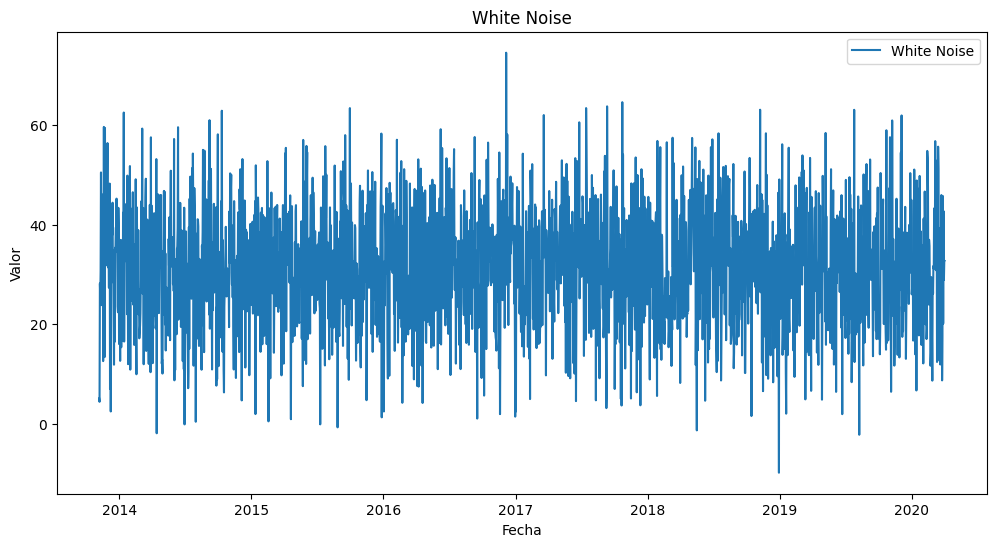

In [3]:
import matplotlib.pyplot as plt

# Graficar el precio de cierre
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Precio de cierre')
plt.title('Precio de cierre a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Graficar el ruido blanco
plt.figure(figsize=(12, 6))
plt.plot(wn, label='White Noise')
plt.title('White Noise')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Estacionariedad

In [4]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller
result = adfuller(wn['Close'].dropna())
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

if result[1] <= 0.05:
    print('La serie es estacionaria')
elif result[0] > result[4]['5%']:
    print('La serie es no estacionaria')
else:
    print('La serie no es estacionaria')

Estadístico ADF: -48.50341795038003
Valor p: 0.0
Valores críticos: {'1%': -3.4331512397333626, '5%': -2.8627775348975866, '10%': -2.567428794167024}
La serie es estacionaria


# Estacionalidad

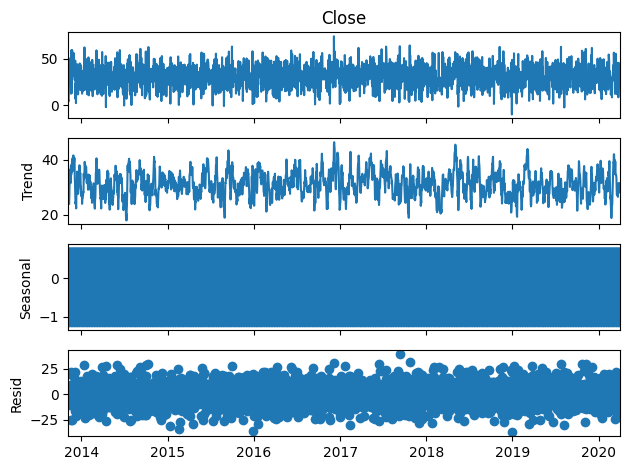

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
result = seasonal_decompose(wn['Close'].dropna(), model='additive')
result.plot()
plt.show()

# result = seasonal_decompose(wn['Close'].dropna(), model='multiplicative')
# result.plot()
# plt.show()

# Autocorrelación

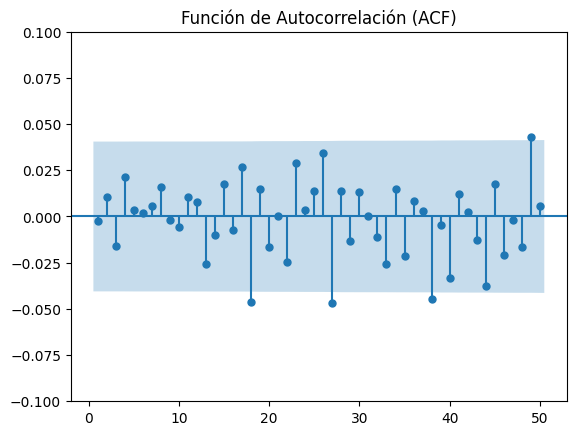

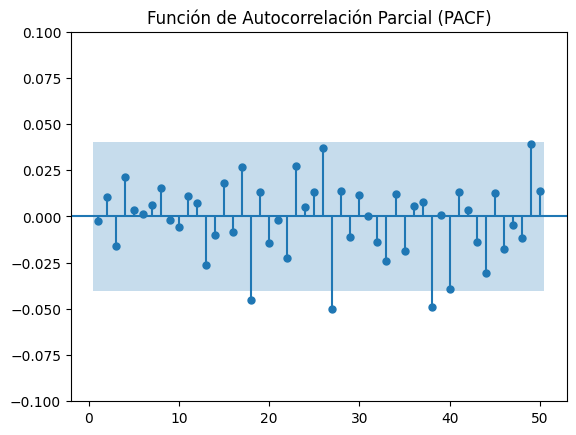

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = wn['Close'].dropna()

# Graficar ACF
plot_acf(data, lags=50, zero=False)
plt.title('Función de Autocorrelación (ACF)')
plt.ylim(-0.1, 0.1)
plt.show()

# Graficar PACF
plot_pacf(data, lags=50, zero=False, method='ols')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.ylim(-0.1, 0.1)
plt.show()